# Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Khám phá dữ liệu

# Đọc dữ liệu từ file csv vào dataframe

In [2]:
df = pd.read_csv('student-mat.csv')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Dữ liệu có bao nhiêu dòng và cột

In [3]:
df.shape

(395, 33)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo quan sát thì mỗi dòng cho biết thông tin của một học sinh.Có vẻ không có dòng nào bị "lạc loài".

### Dữ liệu có các dòng bị lặp không? 

In [4]:
df.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dữ liệu được thu thập trong một cuộc khảo sát của học sinh về các cột trong file "student-mat.csv":
- **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).
- **sex**: student's sex (binary: 'F' - female or 'M' - male)
- **age**: student's age (numeric: from 15 to 22)
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu**:  father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup**: extra educational support (binary: yes or no)
- **famsup**: family educational support (binary: yes or no)
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities**: extra-curricular activities (binary: yes or no)
- **nursery**: attended nursery school (binary: yes or no)
- **higher**: wants to take higher education (binary: yes or no)
- **internet**: Internet access at home (binary: yes or no)
- **romantic**: with a romantic relationship (binary: yes or no)
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health**: number of school absences (numeric: from 0 to 93)
- **G1**: first period grade (numeric: from 0 to 20)
- **G2**: second period grade (numeric: from 0 to 20)
- **G3**: final grade (numeric: from 0 to 20, output target)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# Tiền xử lý

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [6]:
df_temp=df[["age", "Medu", "Fedu", "traveltime","studytime","failures","famrel","freetime","goout","Dalc","health","absences",
            "G1","G2","G3"]]
def missing_ratio(df):
    return df.isna().mean() * 100
def Min(df):
    return df.min()
def Max(df):
    return df.max()
nume_col_profiles_df = df_temp.agg([missing_ratio,min,max])
nume_col_profiles_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0
max,22.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0


### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

In [7]:
df_temp = df[["school", "sex", "address", "famsize", "Pstatus", "Mjob","Fjob","reason","guardian","schoolsup","famsup","paid",
                  "activities","nursery","higher","internet","romantic"]]
def num_diff_vals(df):
    return len(df.value_counts().index)
def diff_vals(df):
    return list(df.dropna().unique())
cate_col_profiles_df = df_temp.agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_profiles_df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
diff_vals,"[GP, MS]","[F, M]","[U, R]","[GT3, LE3]","[A, T]","[at_home, health, other, services, teacher]","[teacher, other, services, health, at_home]","[course, other, home, reputation]","[mother, father, other]","[yes, no]","[no, yes]","[no, yes]","[no, yes]","[yes, no]","[yes, no]","[no, yes]","[no, yes]"


# Đặt câu hỏi

### Thời gian dành cho việc học ảnh hưởng như thế nào đến kết quả thi toán?

### Tiền xử lý

- Thêm một cột để tính điểm trung bình bằng cách lấy cả 3 kì thi công lại chia cho 3
- Cột mức độ uống rượu của học sinh ta sẽ lấy cột mức độ uống rượu hàng ngày cộng với uống rượu cuối tuần

In [8]:
#Tính điểm trung bình của 3 kì thi
df["G_avg"] = (df["G1"]+df["G2"]+df["G3"])/3
df["Dalc"] = df["Dalc"]+df["Walc"]

- Giá trị của thời gian học từ mức 1 đến 4 ta sẽ thay thế giá trị rõ hơn cho nó để dễ dàng quan sát

In [9]:
df['studytime'] = df['studytime'].replace({
    1: '1. < 2 giờ',
    2: '2. 2 - 5 giờ',
    3: '3. 5 - 10 giờ',
    4: '4. > 10 giờ'
})

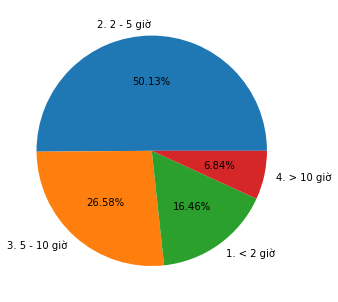

In [10]:
labels = df["studytime"].unique().tolist()
amount = df["studytime"].value_counts().tolist()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
amount
ax.pie(amount, labels = labels,autopct='%1.2f%%')
plt.show()

- Hầu hết các học sinh dành từ 2 đến 5 giờ và 5 đến 10 giờ 1 tuần để học. 

Text(0, 0.5, 'Thời gian học')

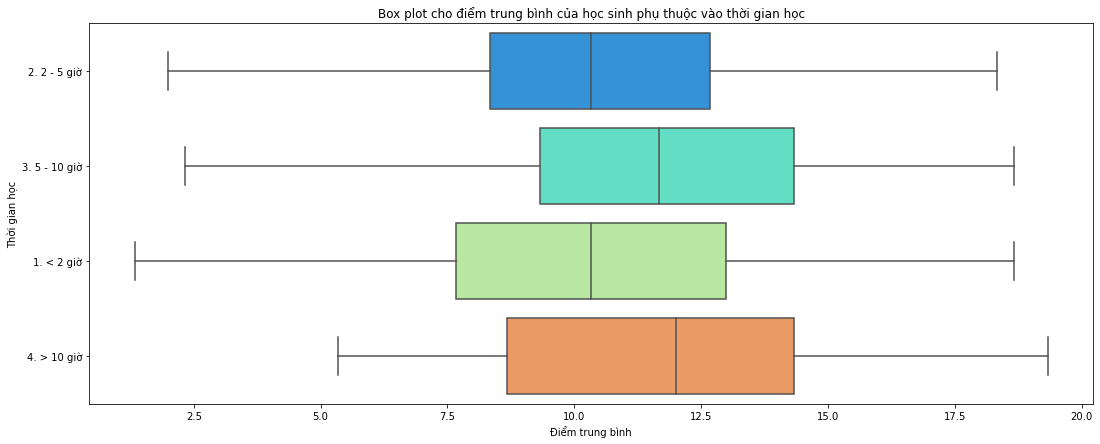

In [11]:
plt.figure(figsize=(18,7))
plt.title("Box plot cho điểm trung bình của học sinh phụ thuộc vào thời gian học")
sns.boxplot(y="studytime", x="G_avg", data = df , orient="h", palette = 'rainbow')
plt.xlabel("Điểm trung bình")
plt.ylabel("Thời gian học")

- Kết quả trung bình thấp nhất được chỉ ra bởi những sinh viên dành ít hơn hai giờ một tuần để học tập. Điều đó là tất nhiên ! Mình là sinh viên mình có thể thấy được thời gian này là không đủ.
- Rất ít sinh viên dành 10 giờ 1 tuần để học. Nhưng điều đó cho ta thấy kết quả rất tốt. Chúng ta nên chăm chỉ học tập hơn

### Uống rượu ảnh hưởng như thế nào đến kết quả kì thi Toán ?

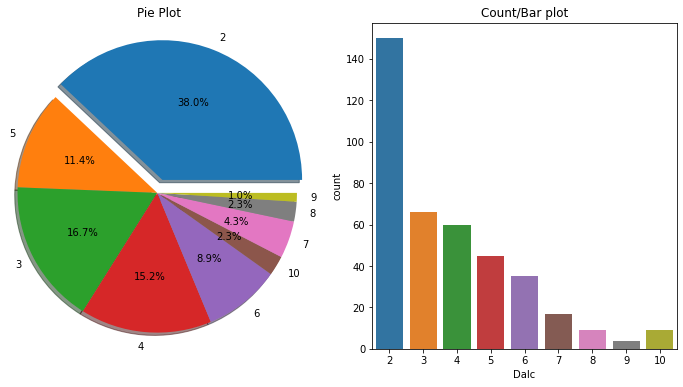

In [12]:
# Pie plot & Bar plot
#setup pie plot
labels= df["Dalc"].unique()
sizes = df["Dalc"].value_counts()[labels]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

#plotting pie plot
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True);
ax1.axis('equal')
ax1.set_title("Pie Plot")
#plotting bar plot
sns.countplot(x="Dalc", data=df, ax=ax2).set_title("Count/Bar plot");

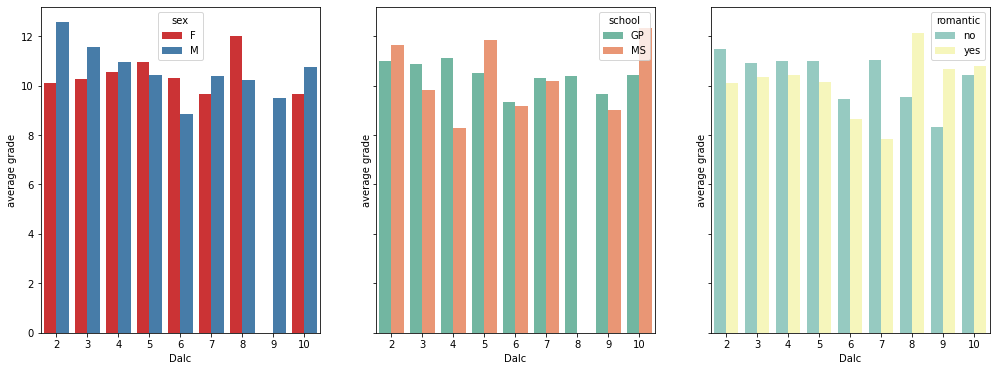

In [13]:
def bivariatte_barplot(df, x="Dalc", y="G_avg", hue=None, ax=None, color_set=1):
      pivtab_ser = df.groupby([x, hue])[y].mean().reset_index()
  #plotting
      sns.barplot(x=x, y=y, hue=hue,
               data=pivtab_ser, ax=ax, palette="Set%s"%(color_set+1)).set_ylabel("average grade")
hues = ['sex', 'school', 'romantic']

#plotting
fig, axes = plt.subplots(1, len(hues), figsize=(17,6), sharey=True)
for idx, hue in enumerate(hues):
      bivariatte_barplot(df, hue=hue, ax=axes[idx], color_set=idx)

In [14]:
df["is_healthy"] = df["health"]>=3

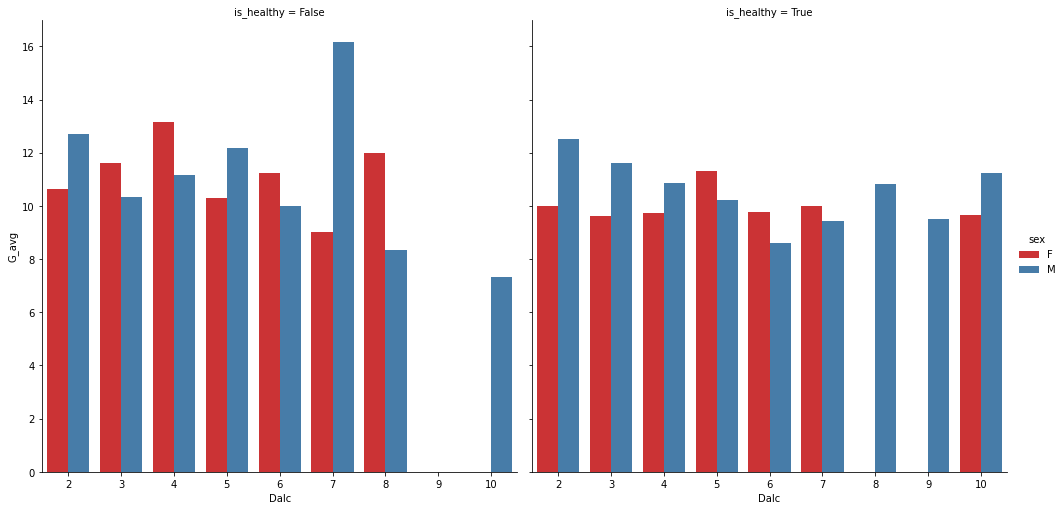

In [15]:
def multivariatte_factplot(x="Dalc", y="G_avg", hue="sex", col="is_healthy", df=pd.DataFrame(), cs=1):
    piv_tab = df.groupby([x, hue, col])[y].mean().reset_index()
    sns.factorplot(x=x, y=y, hue=hue, col=col, data=piv_tab, kind='bar', palette="Set%s"%cs, size=7);
multivariatte_factplot(df=df);

- Nhận thấy điều thú vị là Nam nếu sức khỏe không khỏe mạnh với chỉ số tiêu thụ rượu là 7 thì lại có thành tích học tập tốt nhất. Nhưng ngược lại đối với phụ nữ thì mức độ tiêu thụ rượu là 7 lại điểm thấp nhất trong tất cả các nhóm
- Điều lạ lùng, khó hiểu thì nam giới khỏe mạnh với mức độ tiêu thụ là 6 với 7 lại kém hơn rất nhiều với những người nam giới không khỏe mạnh.
- Phụ nữ không khỏe mạnh với mức độ tiêu thu rượu là 4 lại hoạt động tốt nhất trong các nhóm phụ nữ có lẽ nếu đúng liều lượng sẽ giúp tâm trạng vui vẻ nâng cao hiệu suất học tập.
- Một điều có thể chắc chắn rằng nếu sức khỏe không tốt thêm việc uống nhiều rượu nhất thì chắn chắc điểm sẽ thấp nhất mà thôi


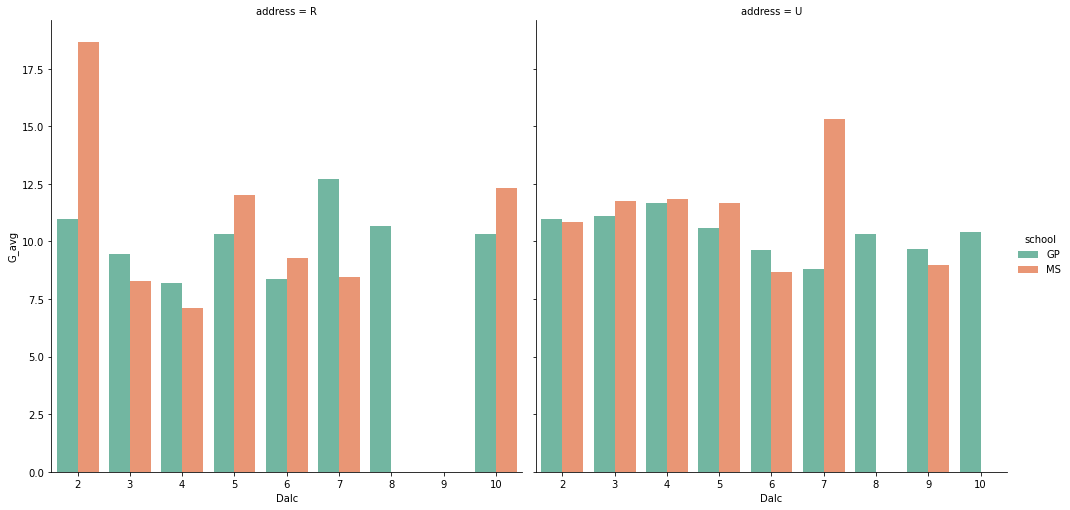

In [16]:
multivariatte_factplot(hue="school", col="address", df=df, cs=2)

- Ở vùng nông thôn thì những học sinh không thường uống rượu thì đạt điểm cao nhất. Cho thấy các học sinh đó quản lý tốt thời gian học và vui chơi của mình.
- Ở khu vực thành thị thì điểm trung bình phân bố đồng đều hơn. Điều thú vị thì những học sinh có mức độ tiêu thụ rượu ở khá cao là 7 lại đạt điểm cao nhất.